<a href="https://colab.research.google.com/github/vidhi1954/MindSync/blob/main/SpeechRecoipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

dataset_path = "/content/drive/MyDrive/Toronto_emotion.zip"

if zipfile.is_zipfile(dataset_path):
    print("Valid ZIP file!")
else:
    print("Corrupted ZIP file. Re-download.")

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Toronto_emotion_unzip")

paths = []
labels = []
for dirname, _, filenames in os.walk('Toronto_emotion_unzip'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')


Valid ZIP file!
Dataset is Loaded


In [ ]:
len(paths)
print(paths[:5])
labels[:5]

['Toronto_emotion_unzip/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_whip_happy.wav', 'Toronto_emotion_unzip/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_hate_happy.wav', 'Toronto_emotion_unzip/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_ripe_happy.wav', 'Toronto_emotion_unzip/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_lid_happy.wav', 'Toronto_emotion_unzip/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_should_happy.wav']


['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
print(df['label'].value_counts())
df.head()

label
happy      800
angry      800
sad        800
fear       800
neutral    800
ps         800
disgust    800
Name: count, dtype: int64


,speech,label
0,Toronto_emotion_unzip/tess toronto emotional s...,happy
1,Toronto_emotion_unzip/tess toronto emotional s...,happy
2,Toronto_emotion_unzip/tess toronto emotional s...,happy
3,Toronto_emotion_unzip/tess toronto emotional s...,happy
4,Toronto_emotion_unzip/tess toronto emotional s...,happy


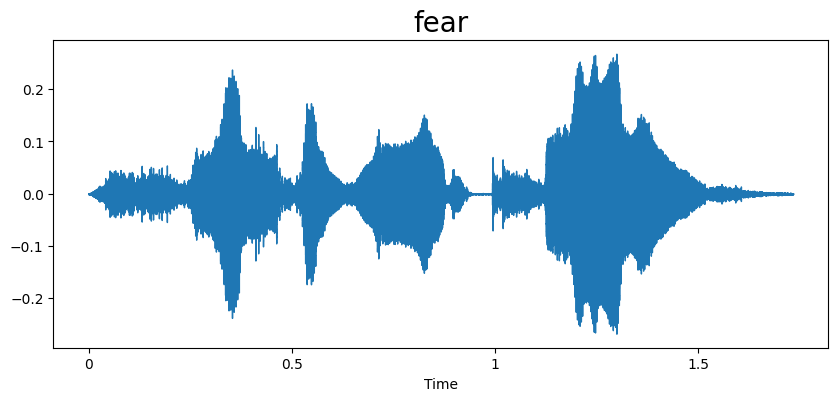

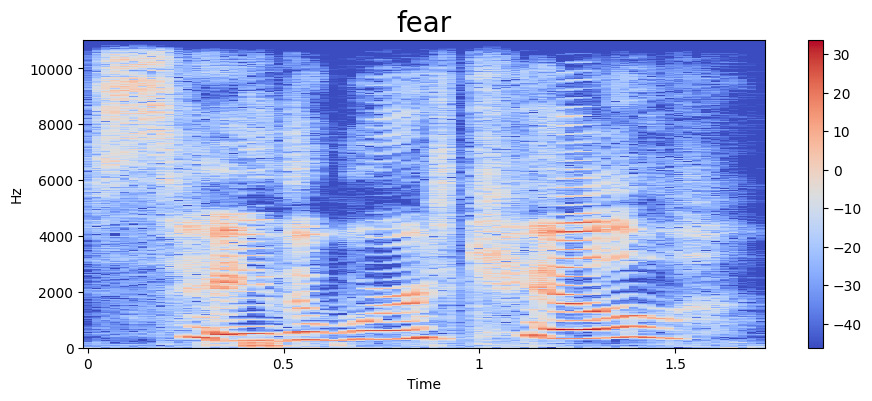

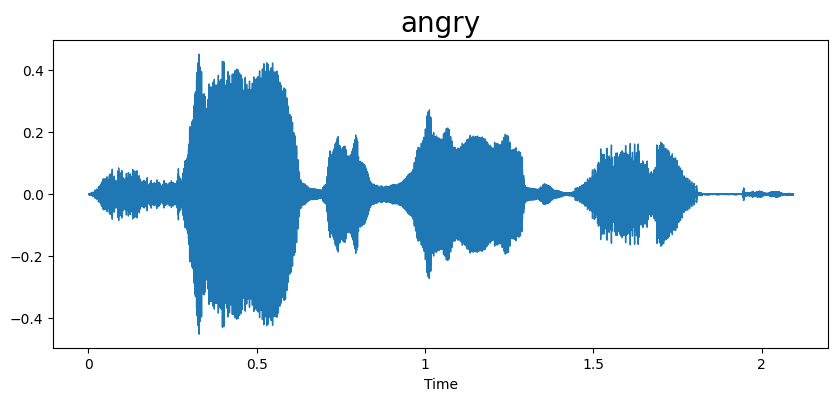

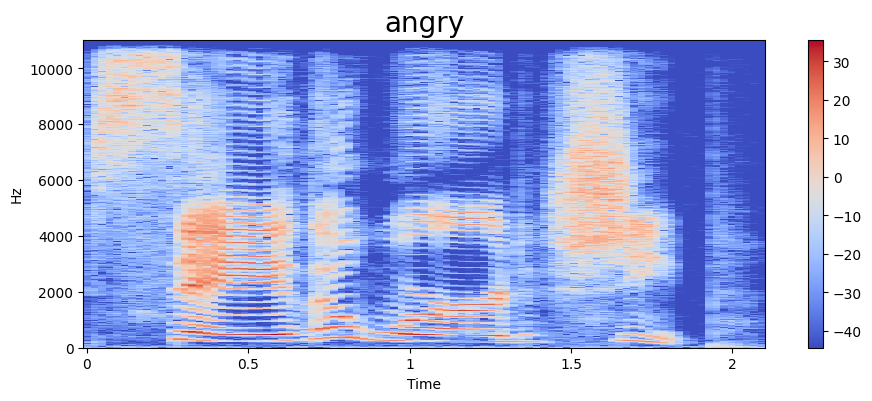

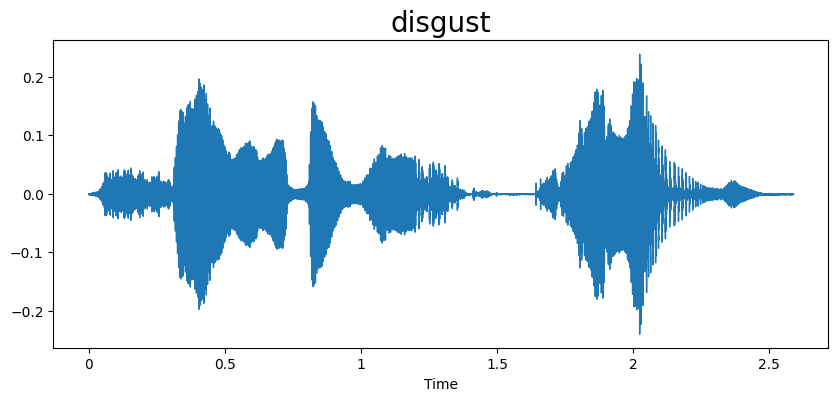

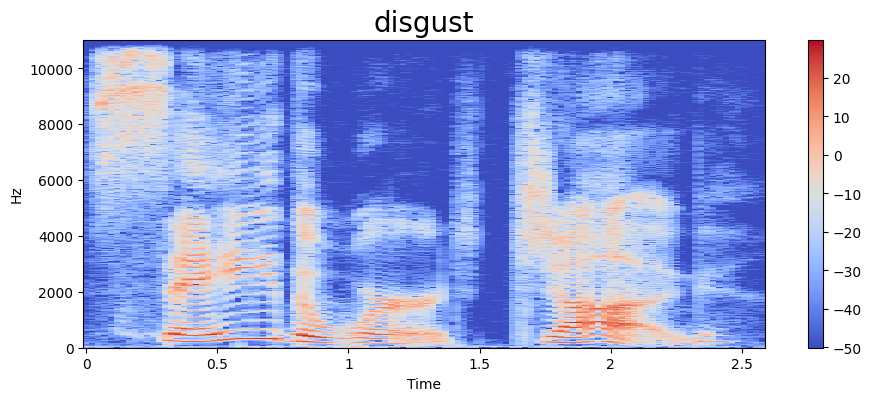

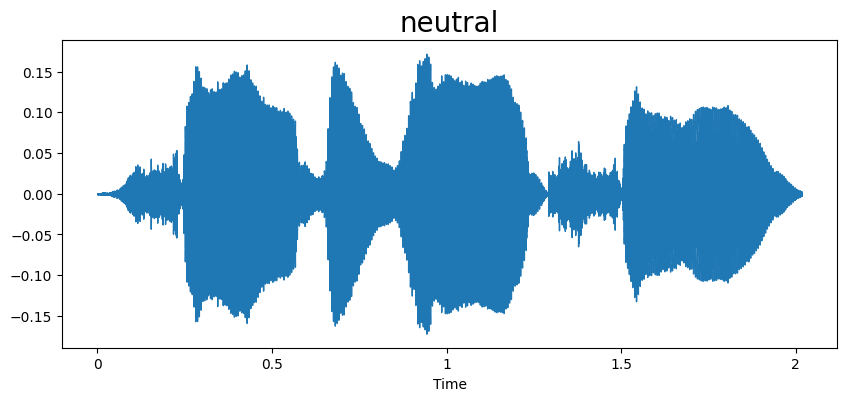

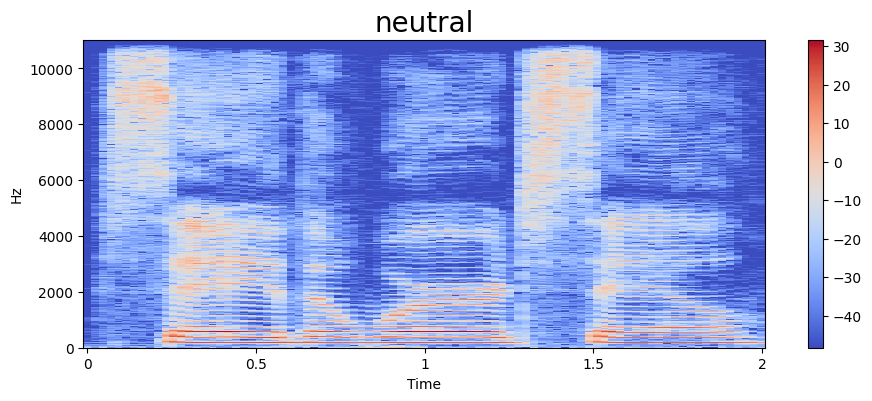

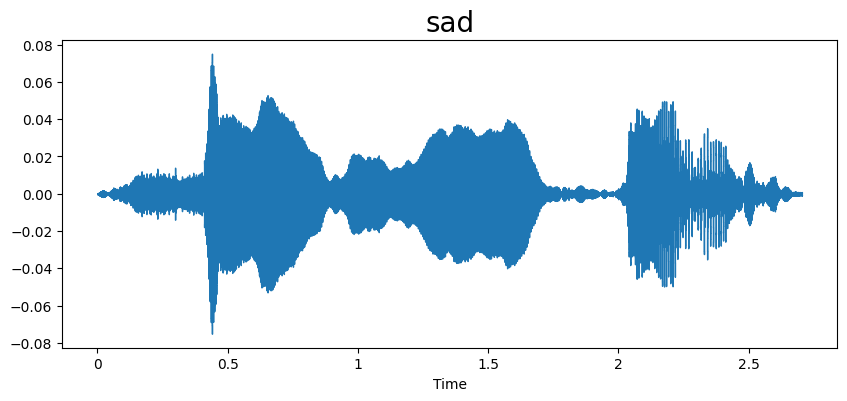

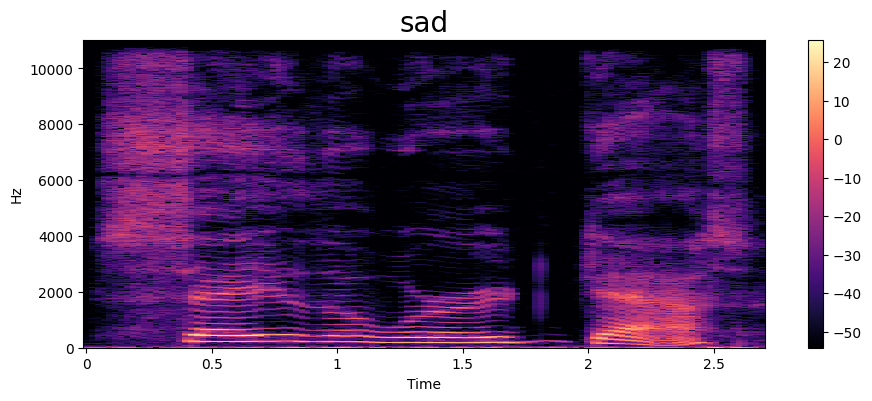

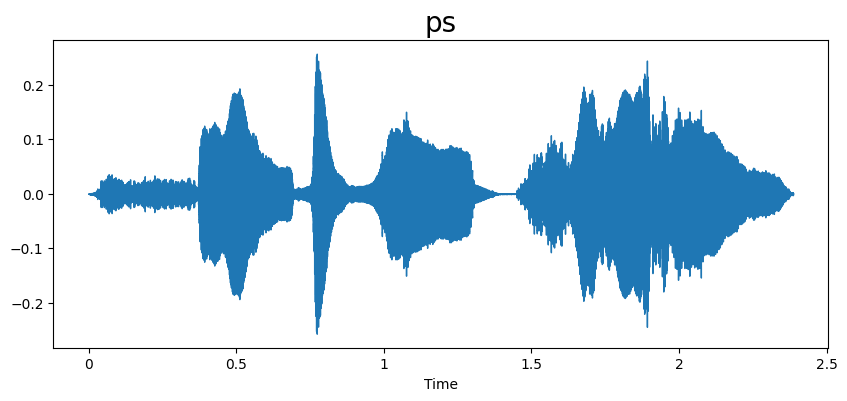

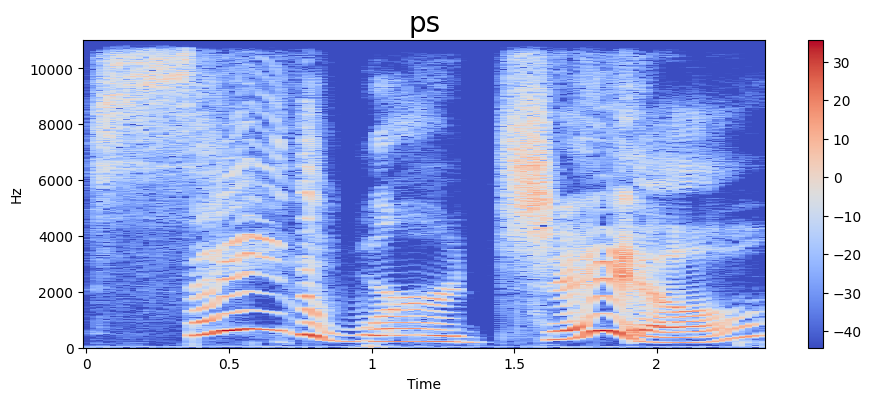

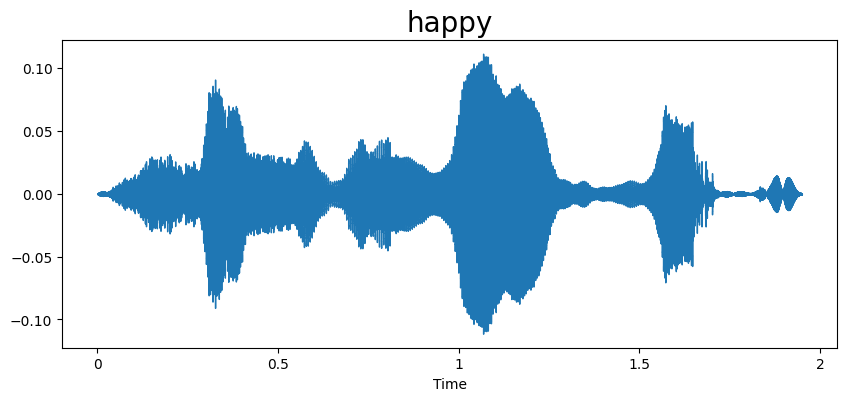

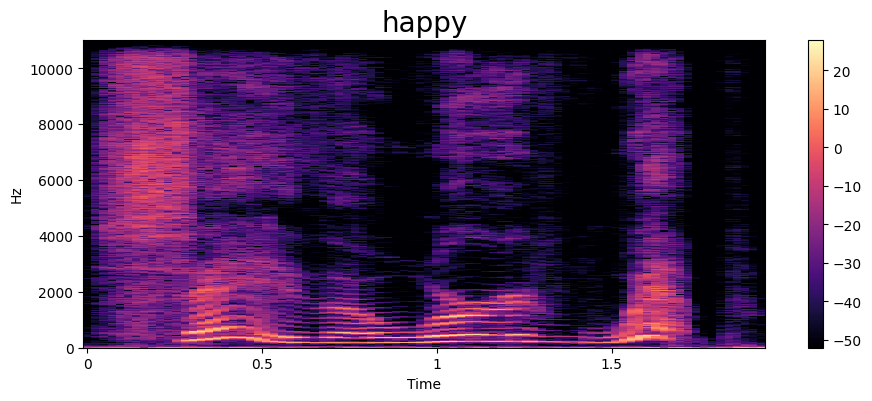

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

emotion='fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

emotion='happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [ ]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.0511349e+02,  1.0239493e+02,  2.0630505e+01, -1.2100556e+01,
        1.4429101e+01,  4.9332495e+00, -5.0019412e+00, -6.4688745e+00,
       -1.7299131e+01, -4.0892529e+00, -1.1270284e+01, -3.5794020e+00,
       -1.9000720e+00, -3.9856761e+00,  3.9328268e+00,  1.4478629e+00,
       -4.9541655e-01,  9.5054979e+00, -2.9301196e-01, -1.8755820e+00,
       -6.9570464e-01, -1.7794540e+00, -3.1551390e+00,  3.5237174e+00,
       -5.2704949e+00,  4.3604827e+00, -4.0956421e+00,  3.5324395e+00,
        3.0523529e+00,  9.5417976e+00,  8.7143335e+00,  1.2428445e+01,
        7.5763822e+00,  4.1895518e+00,  6.1584520e+00,  1.2933317e+01,
        1.2580140e+01,  1.4683528e+01,  1.3905547e+01,  1.5131394e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-505.1135, 102.39493, 20.630505, -12.100556, ..."
1,"[-484.30692, 101.179375, 15.246915, -4.6152806..."
2,"[-455.10623, 120.77885, 22.178722, -17.269854,..."
3,"[-477.3077, 111.65921, 38.825253, 1.8179787, 0..."
4,"[-441.4901, 86.27132, 12.548899, -6.029359, 3...."
...,...
5595,"[-431.2679, 71.080086, 14.987984, -26.789324, ..."
5596,"[-440.43567, 83.42168, 13.29721, -3.8388555, 3..."
5597,"[-445.44513, 74.80048, 12.765974, 2.3341467, 5..."
5598,"[-428.7984, 82.43286, 5.2509885, -24.473654, 3..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
print(X.shape)
X = np.expand_dims(X, -1)
print(X.shape)

(5600, 40)
(5600, 40, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

print(f"Encoded shape: {y.shape}")

label_mapping = {label: idx for idx, label in enumerate(enc.categories_[0])}
print("Label Mapping:", label_mapping)


Encoded shape: (5600, 7)
Label Mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'ps': 5, 'sad': 6}


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=512,shuffle=True)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.2367 - loss: 1.9257 - val_accuracy: 0.2464 - val_loss: 1.7721
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.4338 - loss: 1.6627 - val_accuracy: 0.3821 - val_loss: 1.4340
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.5556 - loss: 1.2708 - val_accuracy: 0.6589 - val_loss: 0.9587
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.6586 - loss: 0.9023 - val_accuracy: 0.7661 - val_loss: 0.6942
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.7757 - loss: 0.6312 - val_accuracy: 0.8491 - val_loss: 0.5002
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.8478 - loss: 0.4548 - val_accuracy: 0.8964 - val_loss: 0.3424
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.8920 - loss: 0.3422 - val_accuracy: 0.9286 - val_loss: 0.2224
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 0.9227 - loss: 0.2547 - val_accuracy: 0.9250 - val_loss:

In [ ]:
model.save('SpeechRecog.h5')

In [ ]:
import pickle
with open("SpeechEmoModel.pkl", "wb") as file:
    pickle.dump(model, file)